In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv
/kaggle/input/word2vec-nlp-tutorial/unlabeledTrainData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip


In [2]:
import torch
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import string
from sklearn import model_selection, metrics
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer

In [3]:
train = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', sep = '\t')
test = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip', sep = '\t')

In [4]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
train['sentiment'].value_counts()


1    12500
0    12500
Name: sentiment, dtype: int64

In [6]:
train.shape, test.shape

((25000, 3), (25000, 2))

In [7]:
train0=train[train['sentiment']==0]
train1=train[train['sentiment']==1]

In [8]:
train0.shape, train1.shape

((12500, 3), (12500, 3))

# Pre-processing Data

In [9]:
#Remove Hashtags
train['review'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
train['review'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
train['review'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

train['review']=train['review'].str.lower()

In [10]:
#Remove Hashtags
test['review'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
test['review'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
test['review'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

test['review']=test['review'].str.lower()

In [11]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [12]:
train['review'] = train['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test['review'] = test['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
train.head()

,id,sentiment,review
0,5814_8,1,stuff going moment mj i've started listening m...
1,2381_9,1,"\the classic war worlds\"" timothy hines entert..."
2,7759_3,0,film starts manager (nicholas bell) giving wel...
3,3630_4,0,must assumed praised film (\the greatest filme...
4,9495_8,1,superbly trashy wondrously unpretentious 80's ...


In [14]:
test.head()

,id,review
0,12311_10,"naturally film who's main themes mortality, no..."
1,8348_2,movie disaster within disaster film. full grea...
2,5828_4,"all, movie kids. saw tonight child loved it. o..."
3,7186_2,afraid dark left impression several different ...
4,12128_7,accurate depiction small time mob life filmed ...


In [15]:
y = train['sentiment']
x = train['review']

# Vectorization

## TF-IDF

In [16]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])

In [18]:
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
train = pd.DataFrame(denselist1, columns=feature_names1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(train, y, test_size=0.2, random_state=0)

## Testing with Models

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [21]:
accuracy = {'TF-IDF':[], 'BoW': []}

### Logistic Regression

In [22]:
#TF-IDF
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[2163  385]
 [ 309 2143]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2548
           1       0.85      0.87      0.86      2452

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

0.8612


### Decision Tree Classifier

In [23]:
#TF-IDF
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[1094 1454]
 [ 277 2175]]
              precision    recall  f1-score   support

           0       0.80      0.43      0.56      2548
           1       0.60      0.89      0.72      2452

    accuracy                           0.65      5000
   macro avg       0.70      0.66      0.64      5000
weighted avg       0.70      0.65      0.64      5000

0.6538


### Gradient Boosting

In [24]:
#TF-IDF
model_GB_tf = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100,subsample=1.0) 
model_GB_tf.fit(X_temp, y_temp)
y_predict_GB_tf = model_GB_tf.predict(X_test)
a=(model_GB_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_tf))
print(metrics.classification_report(y_test, y_predict_GB_tf))
print(metrics.accuracy_score(y_test, y_predict_GB_tf))

[[1928  620]
 [ 330 2122]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2548
           1       0.77      0.87      0.82      2452

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000

0.81


### Random Forest

In [25]:
#TF-IDF
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[2151  397]
 [ 375 2077]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2548
           1       0.84      0.85      0.84      2452

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

0.8456


### K Nearest Neighbours

In [26]:
#TF-IDF
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[ 565 1983]
 [ 218 2234]]
              precision    recall  f1-score   support

           0       0.72      0.22      0.34      2548
           1       0.53      0.91      0.67      2452

    accuracy                           0.56      5000
   macro avg       0.63      0.57      0.50      5000
weighted avg       0.63      0.56      0.50      5000

0.5598


## BoW

In [27]:
train = pd.read_csv('/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', sep = '\t')

In [28]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [29]:
train=train.drop(['id'], axis = 1)

In [30]:
dff = train.drop(['sentiment'], axis = 1)

In [31]:
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(train.sentiment), test_size=0.2)

In [32]:
X_test.shape, X_temp.shape, len(y_test), len(y_temp)

((5000, 1), (20000, 1), 5000, 20000)

In [33]:
X_temp['label'] = y_temp

In [34]:
X_temp.head()


,review,label
1184,Brilliant execution in displaying once and for...,1
18259,Its unfortunate that someone decided to spin o...,0
8407,"OK, I would not normally watch a Farrelly brot...",1
8480,This is the kind of movie which shows the pauc...,0
1464,WOW! <br /><br />This film is the best living ...,1


In [35]:
zero = X_temp[X_temp['label'] == 0]
zero.shape[0]

9964

In [36]:
one = X_temp[X_temp['label'] == 1]
one.shape[0]

10036

In [37]:
ds = pd.concat([zero,one], axis = 0)

In [38]:
ds

,review,label
18259,Its unfortunate that someone decided to spin o...,0
8480,This is the kind of movie which shows the pauc...,0
6573,Once again the same familiar story about a man...,0
6075,Wonderful cast wasted on worthless script. Ten...,0
20284,"Despite some moments in heavy rain, an encount...",0
...,...,...
9211,The first hour or so of the movie was mostly b...,1
15659,Spacecamp is a movie that I plan to show my Da...,1
23361,Now I had the pleasure of first viewing Contam...,1
3228,I'm a bit conflicted over this. The show is on...,1


In [39]:
testdf = X_test
testdf['label'] = y_test
testdf.shape

(5000, 2)

In [40]:
len(testdf[testdf['label']==0]),len(testdf[testdf['label']==1])

(2536, 2464)

In [41]:
ds = pd.concat([ds, testdf], axis = 0)

In [42]:
ds[ds['label']==0].shape, ds[ds['label']==1].shape

((12500, 2), (12500, 2))

In [43]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [44]:
vectorizer_train = CountVectorizer(max_features=1000)
vocabulary_train = vectorizer_train.fit_transform(corpus)
bow = pd.DataFrame(vocabulary_train.toarray(), columns = vectorizer_train.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
bow['labelxyz'] = list(ds.label)

In [46]:
bow_zero = bow[bow.labelxyz == 0]
bow_one = bow[bow.labelxyz == 1]

X_train_zero = bow_zero.sample(frac=0.8, random_state=0)
X_test_zero = bow_zero.drop(X_train_zero.index)
X_train_one = bow_one.sample(frac=0.8, random_state=0)
X_test_one = bow_one.drop(X_train_one.index)

X_train_df = pd.concat([X_train_zero, X_train_one], axis = 0)
bow_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_zero, X_test_one], axis = 0)
bow_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

## Testing with Models

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

### Logistic Regression

In [48]:
#BOW
regressor_LR_bow = LogisticRegression(C= 1.0, penalty='l2', solver= 'liblinear')
regressor_LR_bow.fit(bow_train,y_train)
y_predict_LR_bow = regressor_LR_bow.predict(bow_test)
a=(regressor_LR_bow.score(bow_test,y_test))
accuracy['BoW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_LR_bow))
print(metrics.classification_report(y_test, y_predict_LR_bow))
print(metrics.accuracy_score(y_test, y_predict_LR_bow))

[[2129  371]
 [ 346 2154]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2500
           1       0.85      0.86      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

0.8566


### Decision Tree

In [49]:
model_DT_bow = DecisionTreeClassifier(criterion= 'gini', max_depth= 2) 
model_DT_bow.fit(bow_train,y_train)
y_predict_DT_bow = model_DT_bow.predict(bow_test)
a=(model_DT_bow.score(bow_test,y_test))
accuracy['BoW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_DT_bow))
print(metrics.classification_report(y_test, y_predict_DT_bow))
print(metrics.accuracy_score(y_test, y_predict_DT_bow))

[[1100 1400]
 [ 348 2152]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56      2500
           1       0.61      0.86      0.71      2500

    accuracy                           0.65      5000
   macro avg       0.68      0.65      0.63      5000
weighted avg       0.68      0.65      0.63      5000

0.6504


### Gradient Boosting

In [50]:
#BOW
model_GB_bow = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 1.0)
model_GB_bow.fit(bow_train,y_train)
y_predict_GB_bow = model_GB_bow.predict(bow_test)
a=(model_GB_bow.score(bow_test,y_test))
accuracy['BoW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_bow))
print(metrics.classification_report(y_test, y_predict_GB_bow))
print(metrics.accuracy_score(y_test, y_predict_GB_bow))

[[1902  598]
 [ 374 2126]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      2500
           1       0.78      0.85      0.81      2500

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000

0.8056


### Random Forest

In [51]:
#BOW
model_RF_bow = RandomForestClassifier(max_features='sqrt', n_estimators= 1000)
model_RF_bow.fit(bow_train,y_train)
y_predict_RF_bow = model_RF_bow.predict(bow_test)
a=(model_RF_bow.score(bow_test,y_test))
accuracy['BoW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_RF_bow))
print(metrics.classification_report(y_test, y_predict_RF_bow))
print(metrics.accuracy_score(y_test, y_predict_RF_bow))

[[2068  432]
 [ 411 2089]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2500
           1       0.83      0.84      0.83      2500

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

0.8314


### K neighbors

In [52]:
#BOW
model_KN_bow = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 19, weights= 'distance') 
model_KN_bow.fit(bow_train,y_train)
y_predict_KN_bow = model_KN_bow.predict(bow_test)
a=(model_KN_bow.score(bow_test,y_test))
accuracy['BoW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_bow))
print(metrics.classification_report(y_test, y_predict_KN_bow))
print(metrics.accuracy_score(y_test, y_predict_KN_bow))

[[1265 1235]
 [ 506 1994]]
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      2500
           1       0.62      0.80      0.70      2500

    accuracy                           0.65      5000
   macro avg       0.67      0.65      0.64      5000
weighted avg       0.67      0.65      0.64      5000

0.6518


## Basic Models Evaluation

In [53]:
model = ['LR','DT','GB','RF','KN']
data = {'model':model,'TF-IDF accuracy':accuracy['TF-IDF'], 'BoW accuracy':accuracy['BoW']}
compare_models = pd.DataFrame(data)
compare_models

,model,TF-IDF accuracy,BoW accuracy
0,LR,0.8612,0.8566
1,DT,0.6538,0.6504
2,GB,0.8100,0.8056
3,RF,0.8456,0.8314
4,KN,0.5598,0.6518


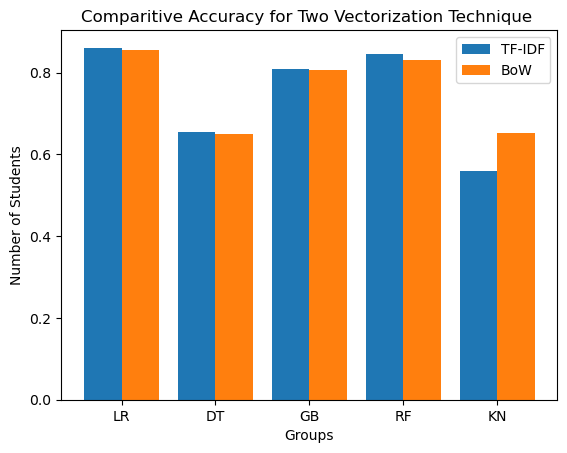

In [54]:
X_axis = np.arange(len(compare_models['model']))
  
plt.bar(X_axis - 0.2, compare_models['TF-IDF accuracy'], 0.4, label = 'TF-IDF')
plt.bar(X_axis + 0.2, compare_models['BoW accuracy'], 0.4, label = 'BoW')
  
plt.xticks(X_axis, compare_models['model'])
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Comparitive Accuracy for Two Vectorization Technique ")
plt.legend()
plt.savefig('Comparitive Accuracy for Two Vectorization Technique.pdf', bbox_inches='tight')
plt.show()